In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
import seaborn as sns

In [ ]:
stock_market = pd.read_csv("/content/stockpricepredictiondata.csv")
stock_market.head()

In [ ]:
stock_market.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25160 entries, 0 to 25159
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Company     25160 non-null  object
 1   Date        25160 non-null  object
 2   Close/Last  25160 non-null  object
 3   Volume      25160 non-null  int64 
 4   Open        25160 non-null  object
 5   High        25160 non-null  object
 6   Low         25160 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.3+ MB


In [ ]:
stock_market.describe()

,Volume
count,2.516000e+04
mean,5.131764e+07
std,6.399143e+07
min,1.143952e+06
25%,1.200394e+07
50%,2.672083e+07
75%,6.857269e+07
max,1.065209e+09


import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_39, *['Volume'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_40, *['Volume'], **{})
chart

In [ ]:
stock_market.sample(10)

,Company,Date,Close/Last,Volume,Open,High,Low
23440,NFLX,05/15/2020,$454.19,7243998,$440.70,$455.00,$437.51
25143,NFLX,08-09-2013,$36.1071,12321754,$35.7128,$36.2443,$35.6857
19867,TSLA,07/30/2014,$15.2613,73707698,$14.7947,$15.3067,$14.736
14508,META,11/13/2015,$103.95,30161510,$107.71,$108.25,$103.83
6637,MSFT,02/28/2017,$63.98,23225630,$64.08,$64.20,$63.76
22619,AMD,08/21/2013,$3.61,13950500,$3.62,$3.68,$3.60
5210,MSFT,10/27/2022,$226.75,40424650,$231.04,$233.69,$225.78
10539,QCOM,08/24/2021,$144.46,7066814,$144.59,$145.5925,$143.8433
17841,TSLA,08/16/2022,$306.5633,88136319,$311.6666,$314.6666,$302.8833
7340,MSFT,05/14/2014,$40.24,18803840,$40.30,$40.45,$40.05


In [ ]:
stock_market.isnull().sum()

Company       0
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64

In [ ]:
stock_market['Company'].unique()


array(['AAPL', 'SBUX', 'MSFT', 'CSCO', 'QCOM', 'META', 'AMZN', 'TSLA',
       'AMD', 'NFLX'], dtype=object)

In [ ]:
stock_market.dtypes

Company       object
Date          object
Close/Last    object
Volume         int64
Open          object
High          object
Low           object
dtype: object

In [ ]:
stocks_dataframe = pd.DataFrame(stock_market)

# Convert the 'Date' column to datetime with flexible parsing
stocks_dataframe['Date'] = pd.to_datetime(stock_market['Date'], format='%m-%d-%Y', errors='coerce')
stocks_dataframe['Date'].fillna(pd.to_datetime(stock_market['Date'], format='%m/%d/%Y', errors='coerce'), inplace=True)


date_time_interval = stocks_dataframe['Date'].dt.normalize()

In [ ]:
date_time_interval

0       2023-07-17
1       2023-07-14
2       2023-07-13
3       2023-07-12
4       2023-07-11
           ...    
25155   2013-07-24
25156   2013-07-23
25157   2013-07-22
25158   2013-07-19
25159   2013-07-18
Name: Date, Length: 25160, dtype: datetime64[ns]

In [ ]:
stock_market.Date = date_time_interval

In [ ]:
stock_market.dtypes

Company               object
Date          datetime64[ns]
Close/Last            object
Volume                 int64
Open                  object
High                  object
Low                   object
dtype: object

In [ ]:
stock_market['Close/Last'] = stock_market['Close/Last'].map(lambda x: float(x.replace('$', '')))
stock_market['Open'] = stock_market['Open'].map(lambda x: float(x.replace('$', '')))
stock_market['High'] = stock_market['High'].map(lambda x: float(x.replace('$', '')))
stock_market['Low'] = stock_market['Low'].map(lambda x: float(x.replace('$', '')))




In [ ]:
stock_market.dtypes

Company               object
Date          datetime64[ns]
Close/Last           float64
Volume                 int64
Open                 float64
High                 float64
Low                  float64
dtype: object

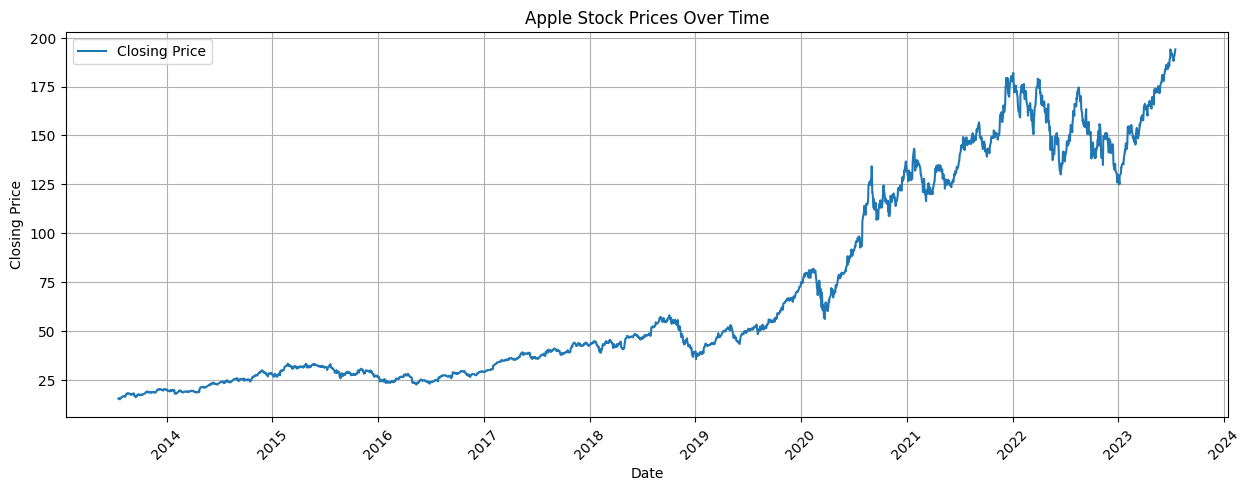

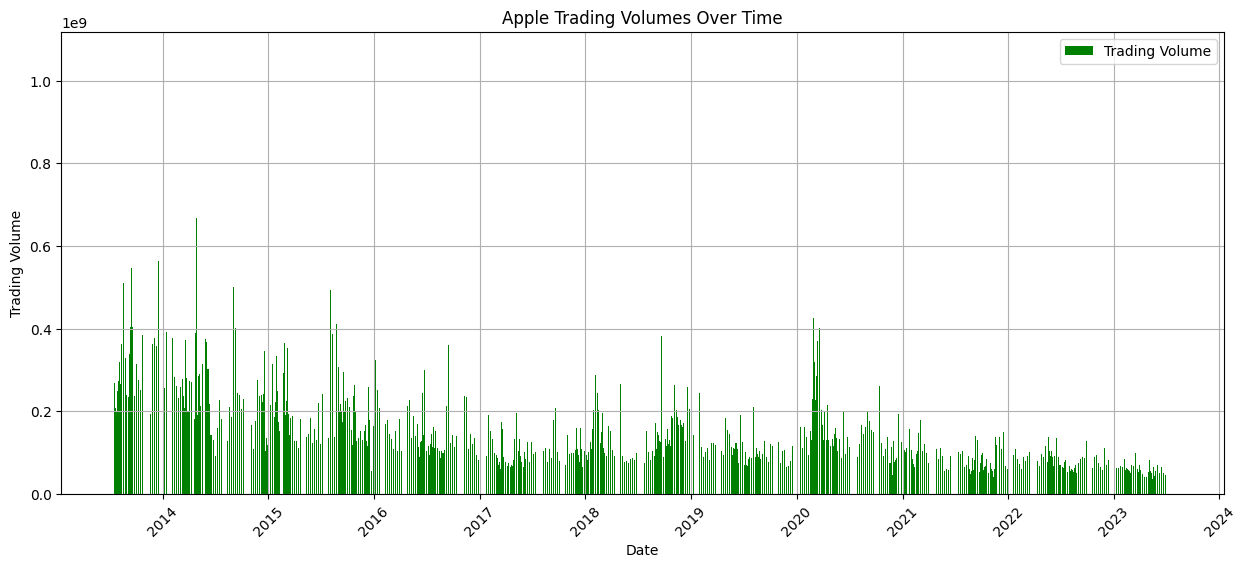

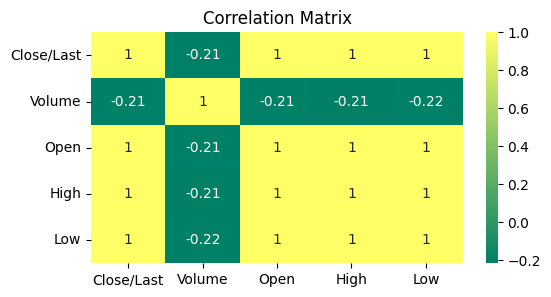

In [ ]:
apple_data = stock_market[stock_market['Company'] == 'AAPL']

# Line chart for stock prices over time
plt.figure(figsize=(15, 5))
plt.plot(apple_data['Date'], apple_data['Close/Last'], label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Apple Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(apple_data['Date'], apple_data['Volume'], label='Trading Volume', color='green')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Apple Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='summer')
plt.title('Correlation Matrix')
plt.show()

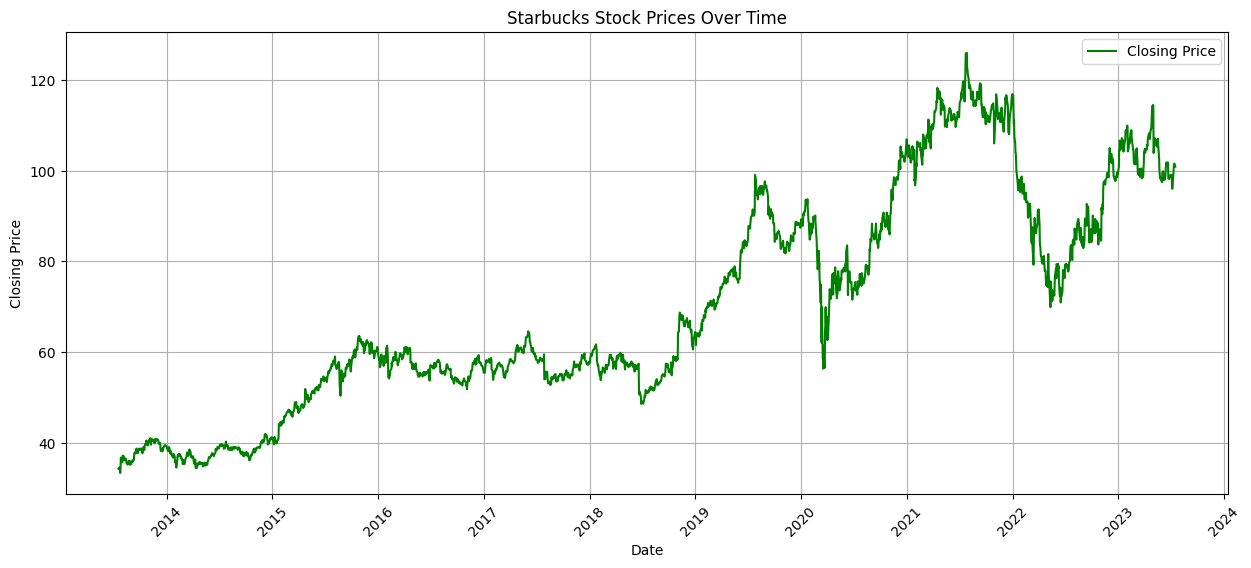

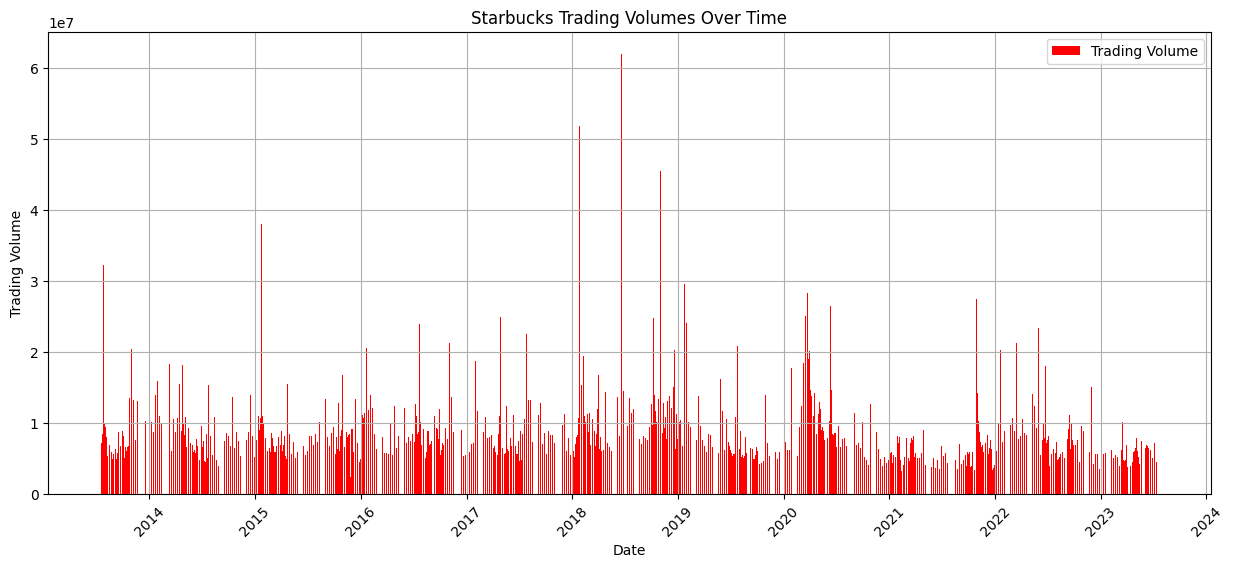

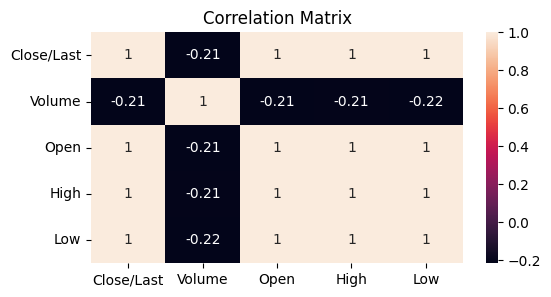

In [ ]:
starbucks_data = stock_market[stock_market['Company'] == 'SBUX']

# Line chart for stock prices over time
plt.figure(figsize=(15, 6))
plt.plot(starbucks_data['Date'], starbucks_data['Close/Last'], color='green',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Starbucks Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(starbucks_data['Date'], starbucks_data['Volume'], label='Trading Volume', color='red')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Starbucks Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

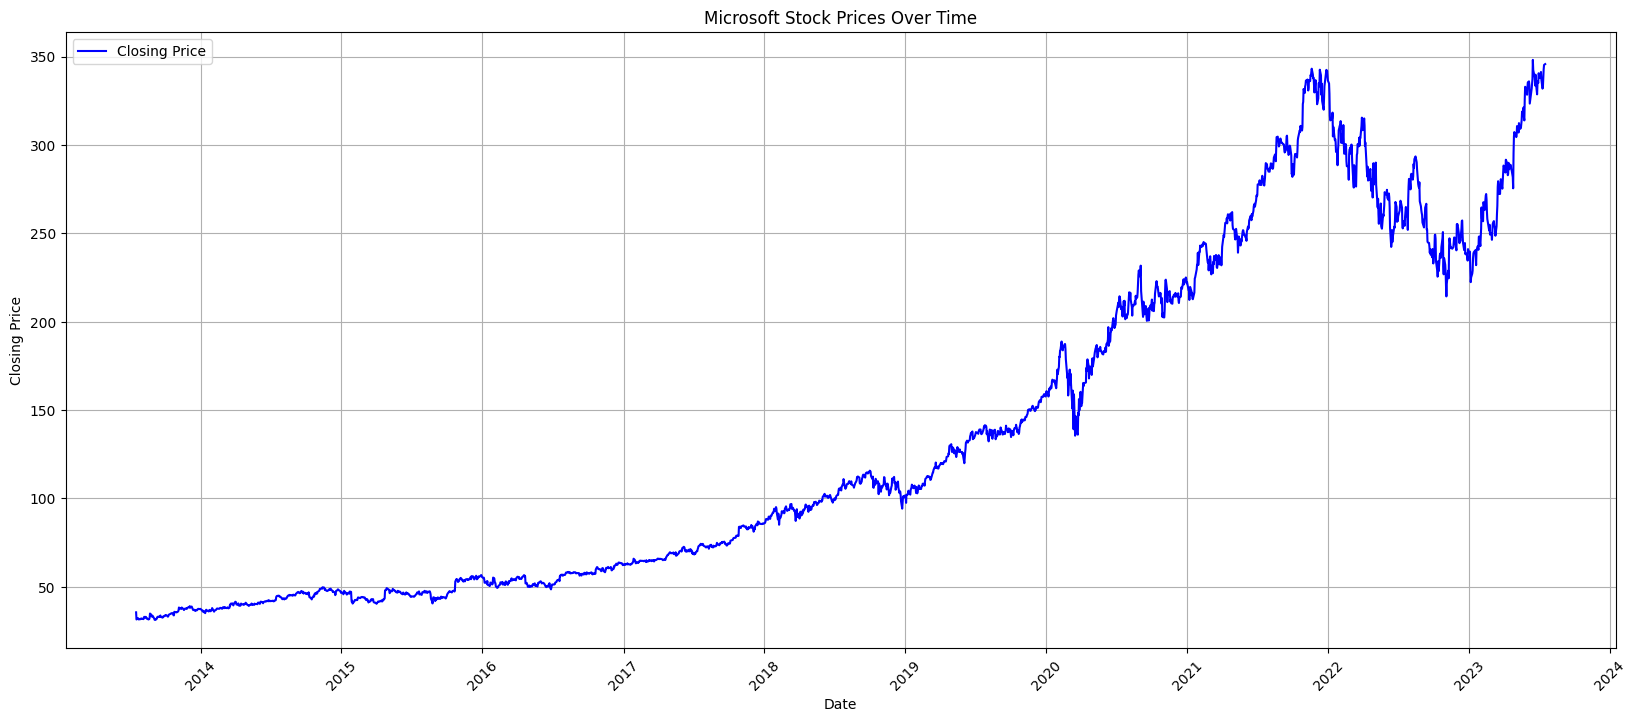

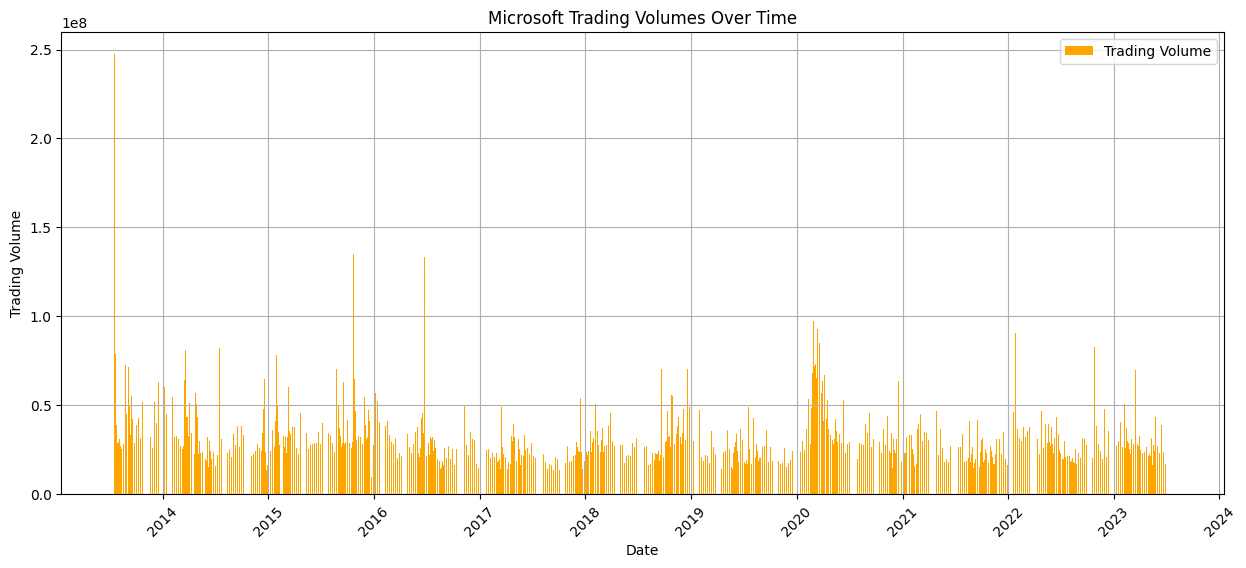

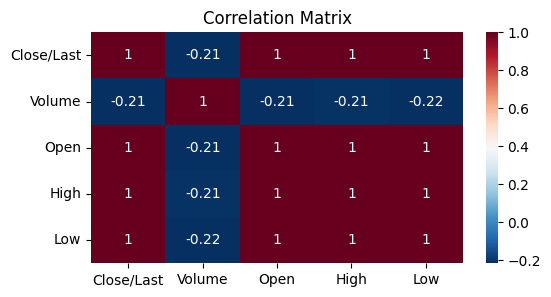

In [ ]:
microsoft_data = stock_market[stock_market['Company'] == 'MSFT']

# Line chart for stock prices over time
plt.figure(figsize=(20, 8))
plt.plot(microsoft_data['Date'],microsoft_data['Close/Last'], color='blue',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Microsoft Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(microsoft_data['Date'], microsoft_data['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Microsoft Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="RdBu_r")
plt.title('Correlation Matrix')
plt.show()

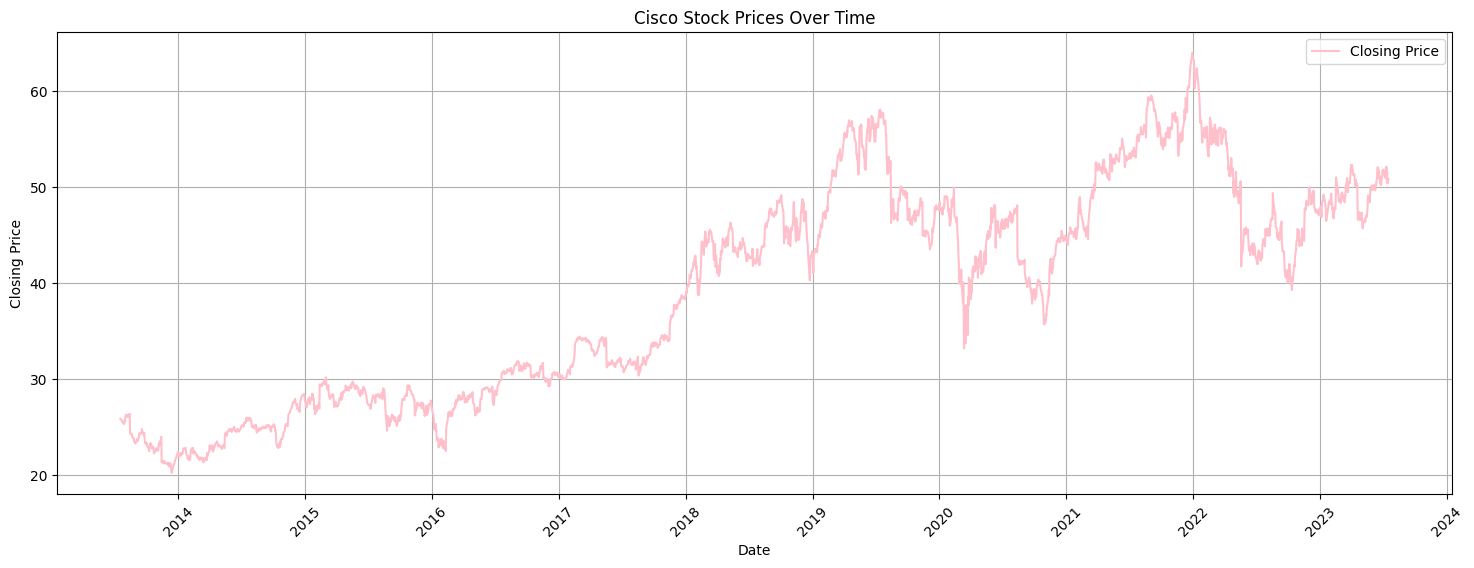

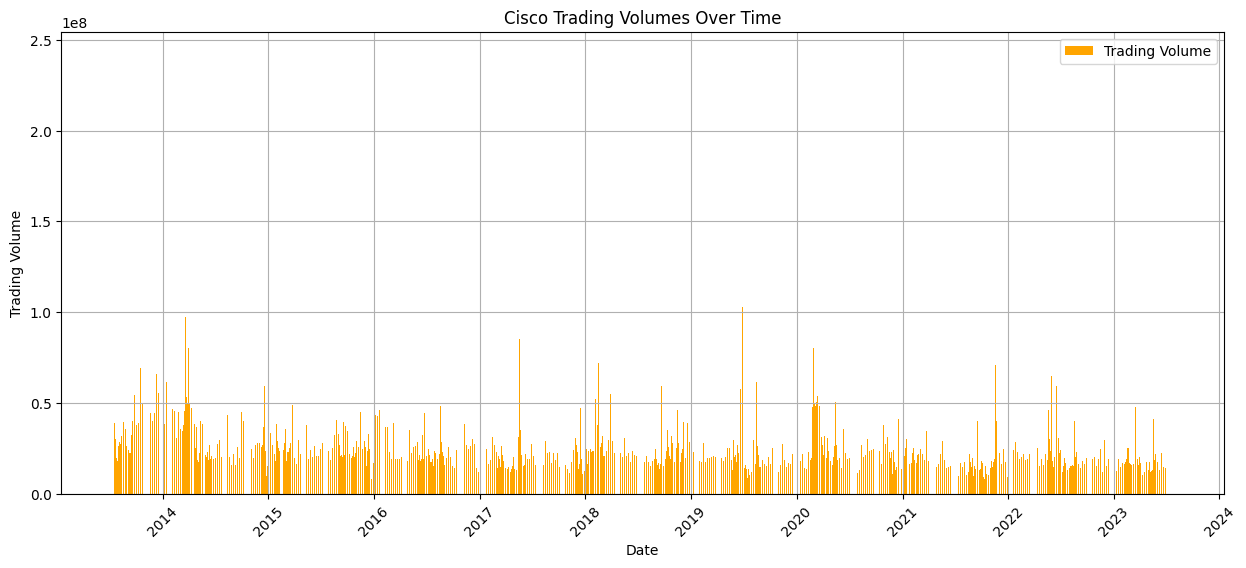

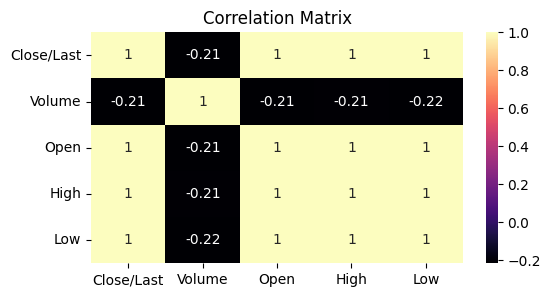

In [ ]:
cisco_data = stock_market[stock_market['Company'] == 'CSCO']

# Line chart for stock prices over time
plt.figure(figsize=(18, 6))
plt.plot(cisco_data['Date'], cisco_data['Close/Last'], color='pink',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Cisco Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(cisco_data['Date'], cisco_data['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Cisco Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="magma")
plt.title('Correlation Matrix')
plt.show()

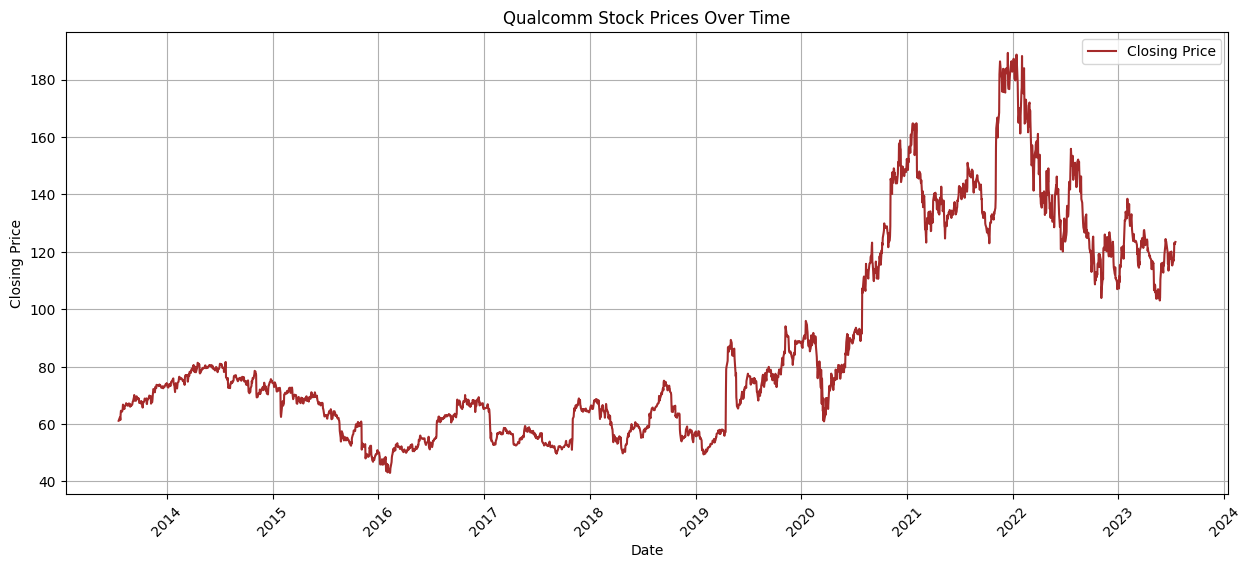

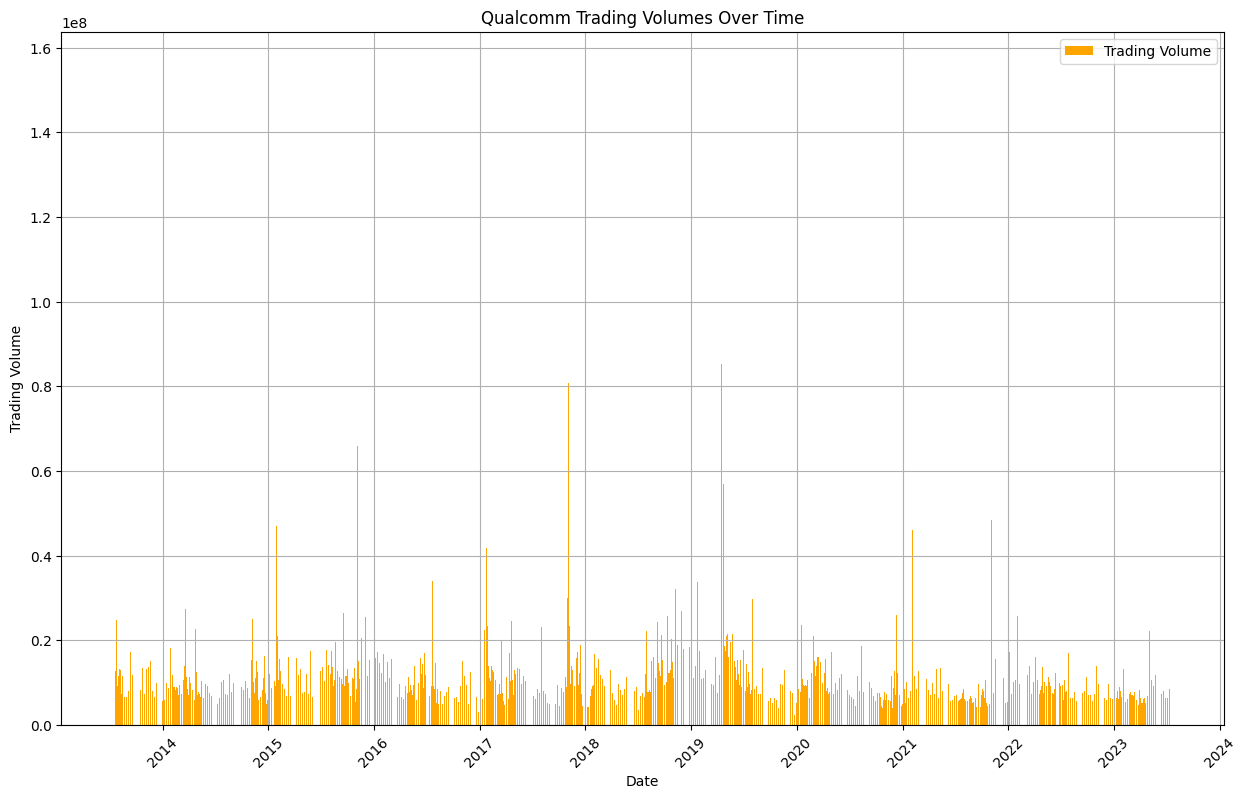

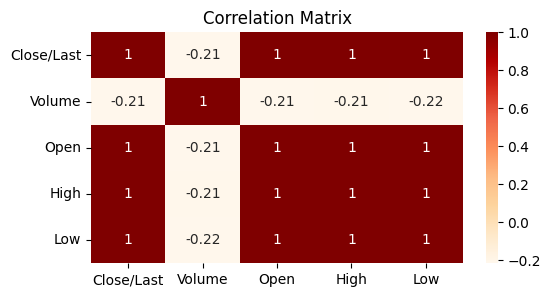

In [ ]:
qualcomm_data = stock_market[stock_market['Company'] == 'QCOM']

# Line chart for stock prices over time
plt.figure(figsize=(15, 6))
plt.plot(qualcomm_data['Date'], qualcomm_data['Close/Last'], color='brown',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Qualcomm Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 9))
plt.bar(qualcomm_data['Date'], qualcomm_data['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Qualcomm Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="OrRd")
plt.title('Correlation Matrix')
plt.show()

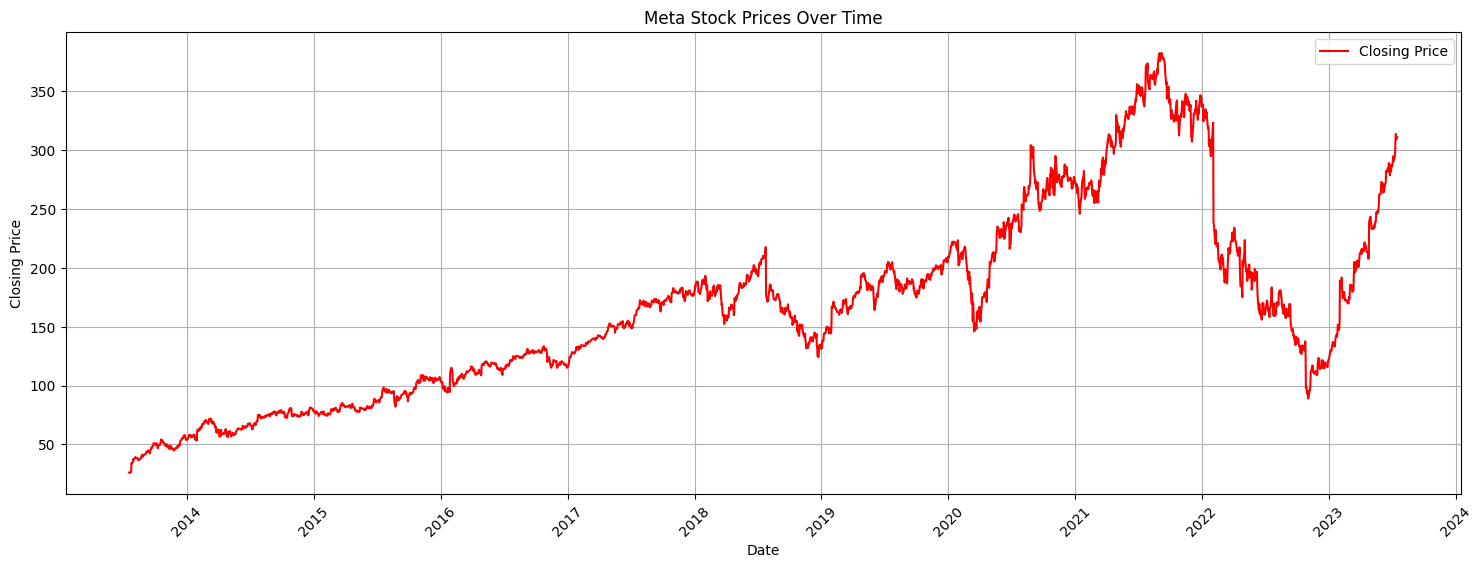

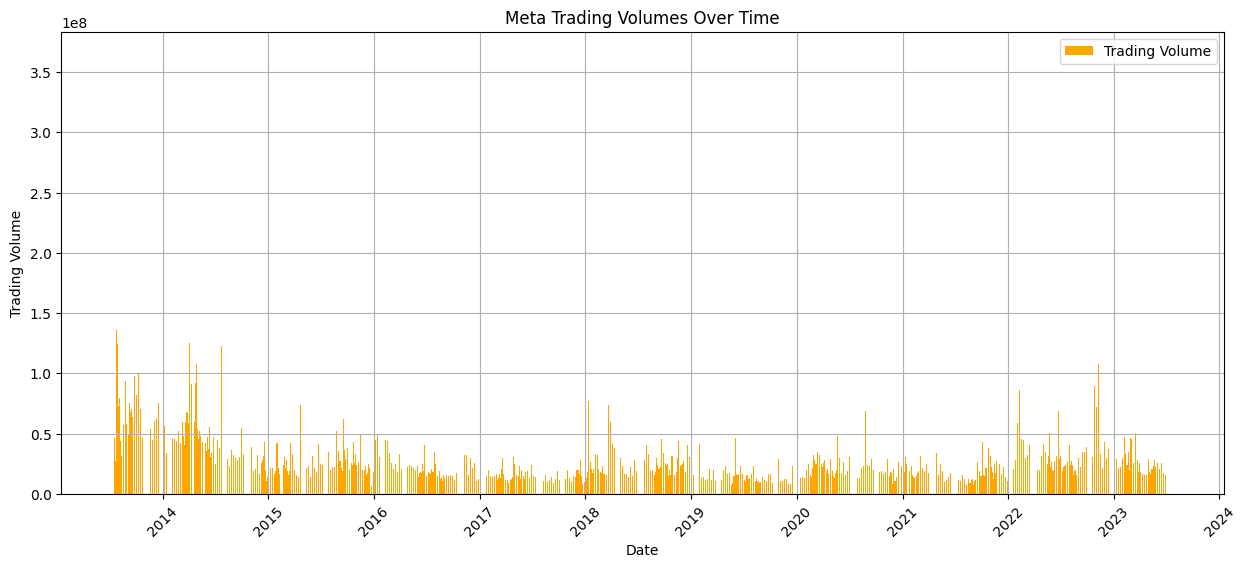

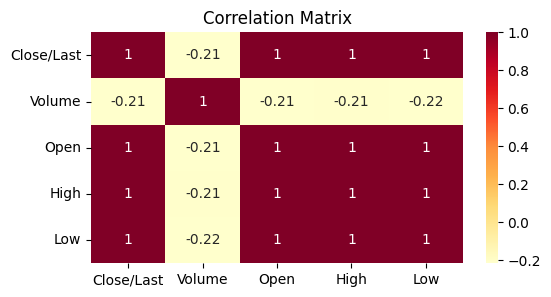

In [ ]:
meta_data = stock_market[stock_market['Company'] == 'META']

# Line chart for stock prices over time
plt.figure(figsize=(18, 6))
plt.plot(meta_data['Date'], meta_data['Close/Last'], color='red',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Meta Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(meta_data['Date'], meta_data['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Meta Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="YlOrRd")
plt.title('Correlation Matrix')
plt.show()

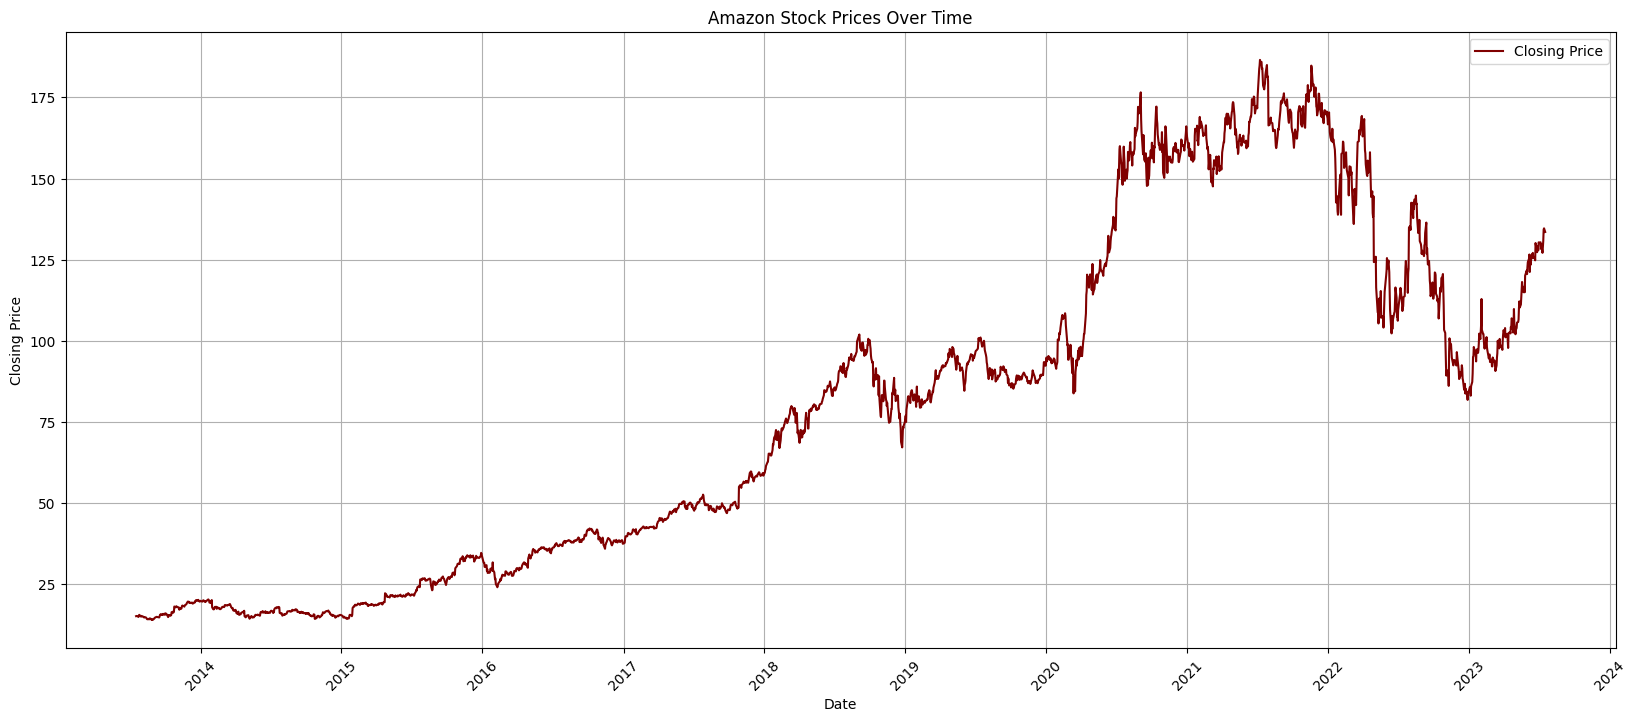

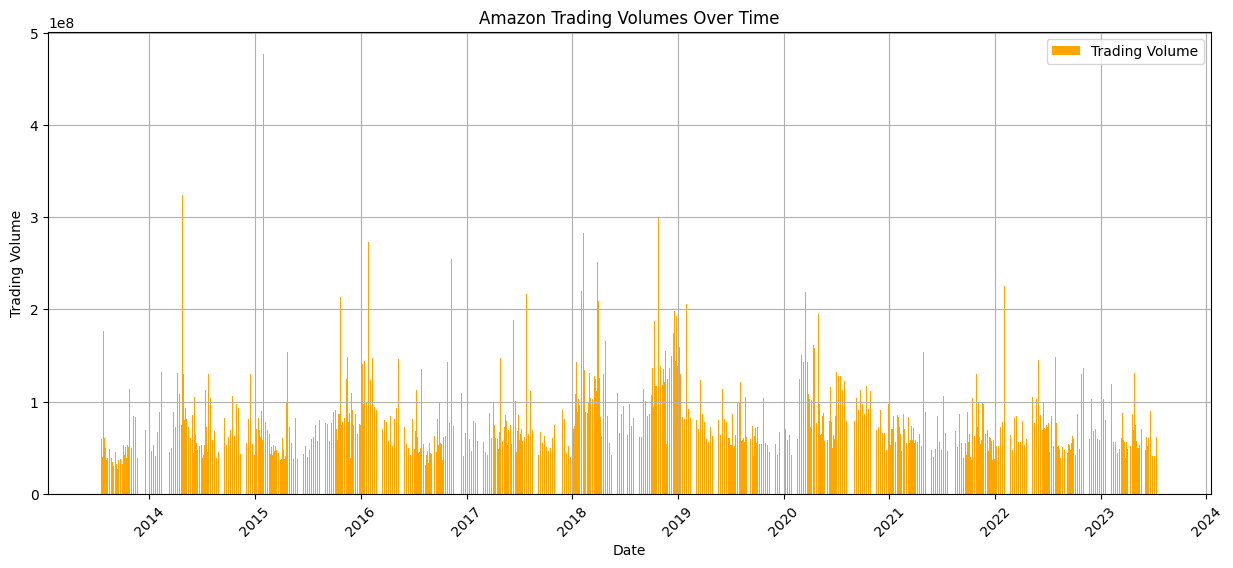

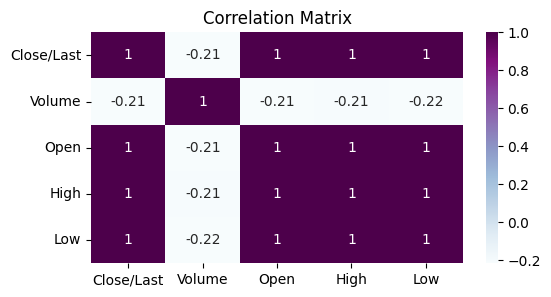

In [ ]:
amazon_data = stock_market[stock_market['Company'] == 'AMZN']

# Line chart for stock prices over time
plt.figure(figsize=(20, 8))
plt.plot(amazon_data['Date'], amazon_data['Close/Last'], color='maroon',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Amazon Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(amazon_data['Date'], amazon_data['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Amazon Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="BuPu")
plt.title('Correlation Matrix')
plt.show()

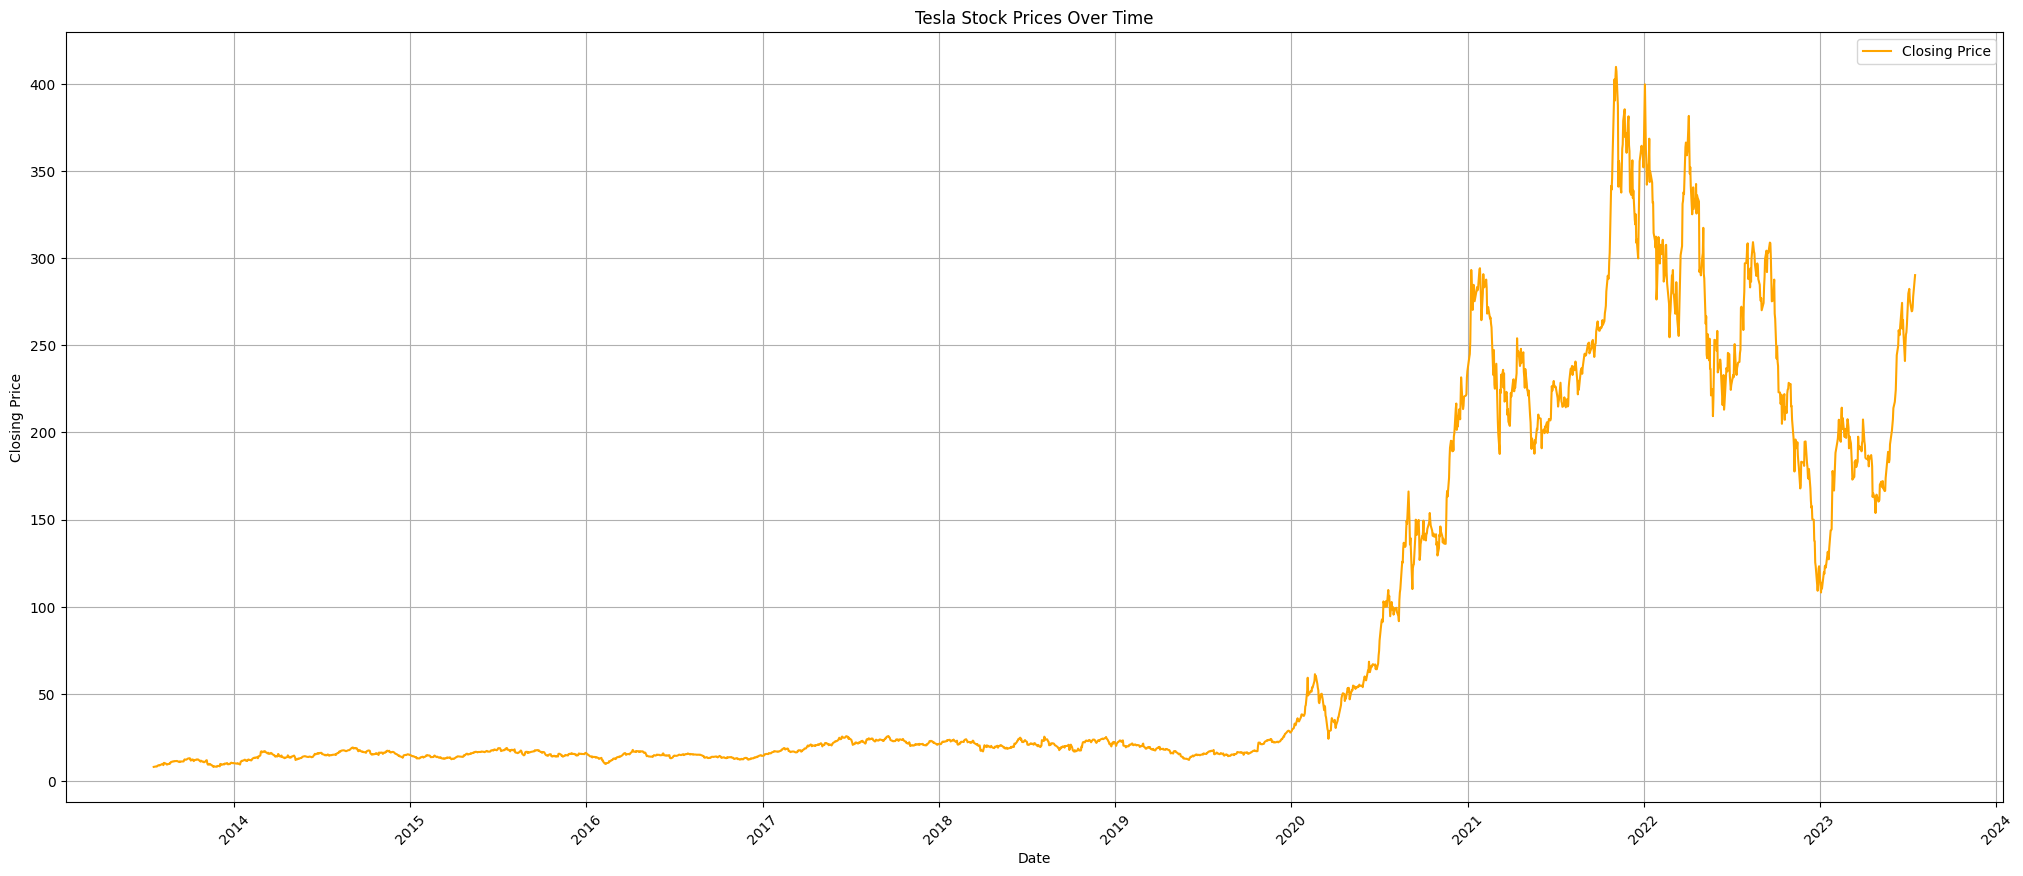

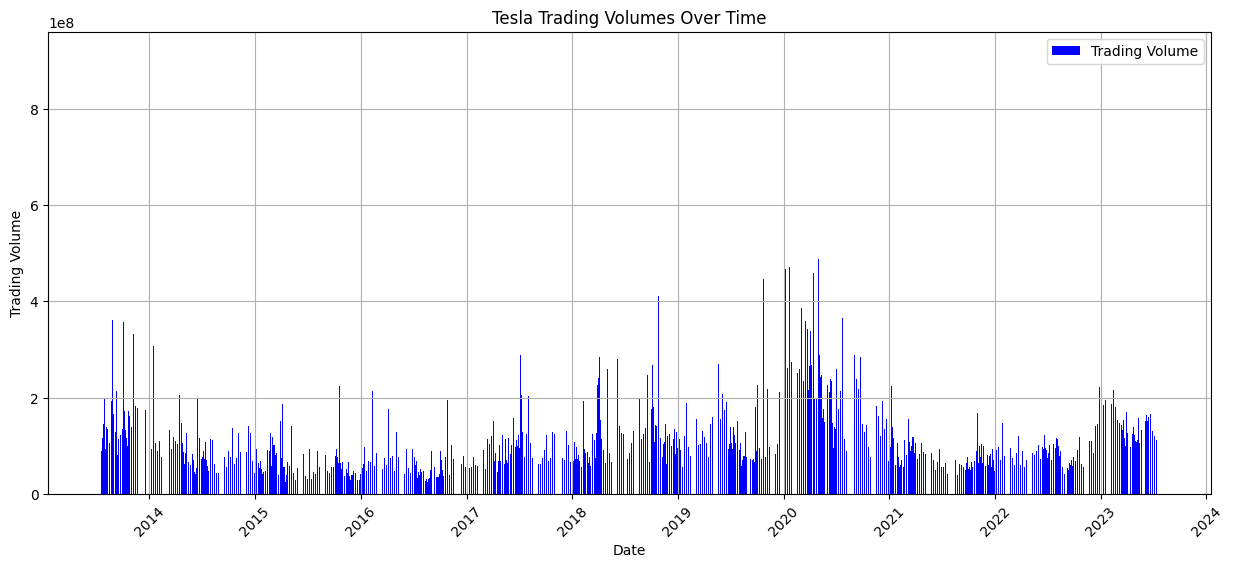

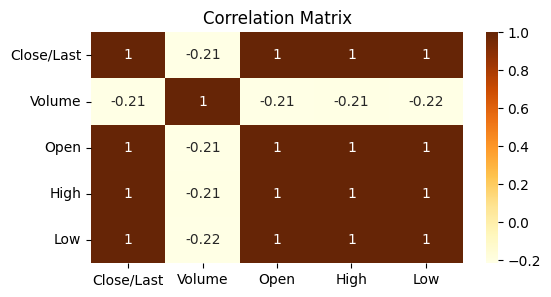

In [ ]:
tesla_data = stock_market[stock_market['Company'] == 'TSLA']

# Line chart for stock prices over time
plt.figure(figsize=(25, 10))
plt.plot(tesla_data['Date'], tesla_data['Close/Last'], color='orange',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Tesla Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(tesla_data['Date'], tesla_data['Volume'], label='Trading Volume', color='blue')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Tesla Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="YlOrBr")
plt.title('Correlation Matrix')
plt.show()

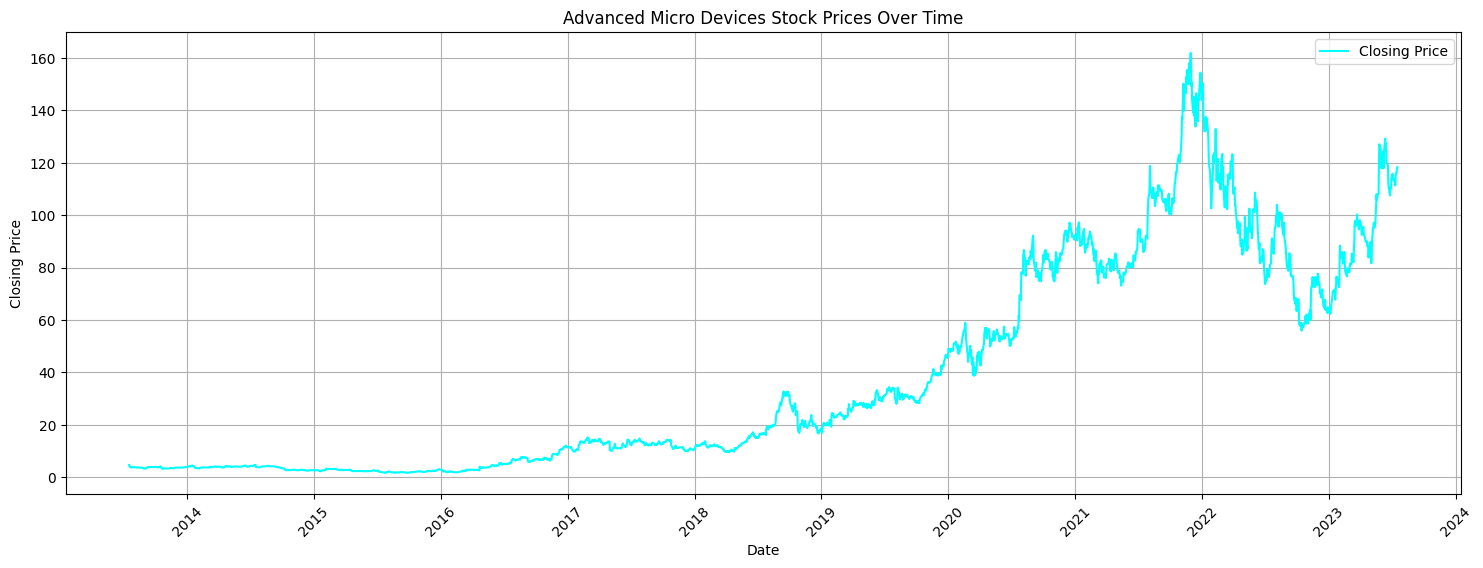

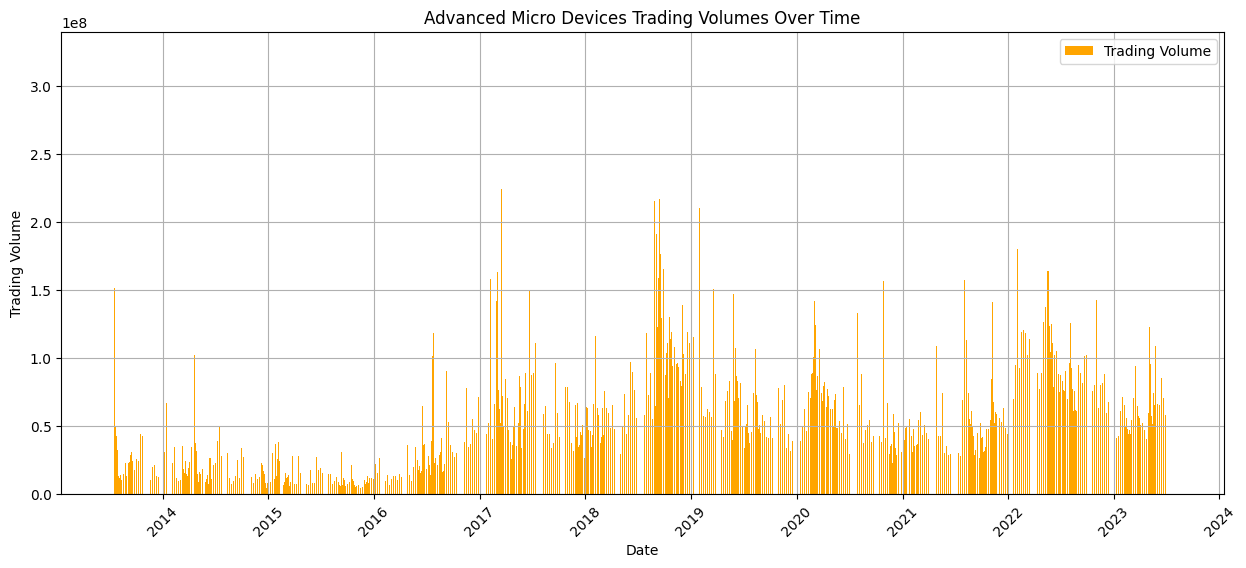

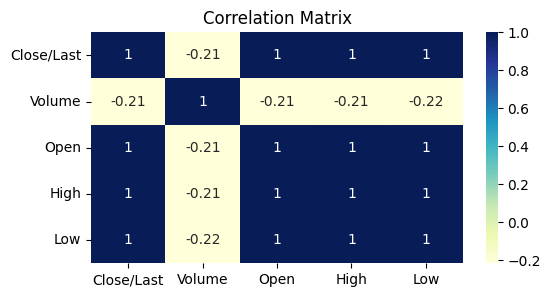

In [ ]:
advanced_micro_devices_data = stock_market[stock_market['Company'] == 'AMD']

# Line chart for stock prices over time
plt.figure(figsize=(18, 6))
plt.plot(advanced_micro_devices_data ['Date'],advanced_micro_devices_data ['Close/Last'], color='cyan',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Advanced Micro Devices Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 6))
plt.bar(advanced_micro_devices_data ['Date'], advanced_micro_devices_data ['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Advanced Micro Devices Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="YlGnBu")
plt.title('Correlation Matrix')
plt.show()

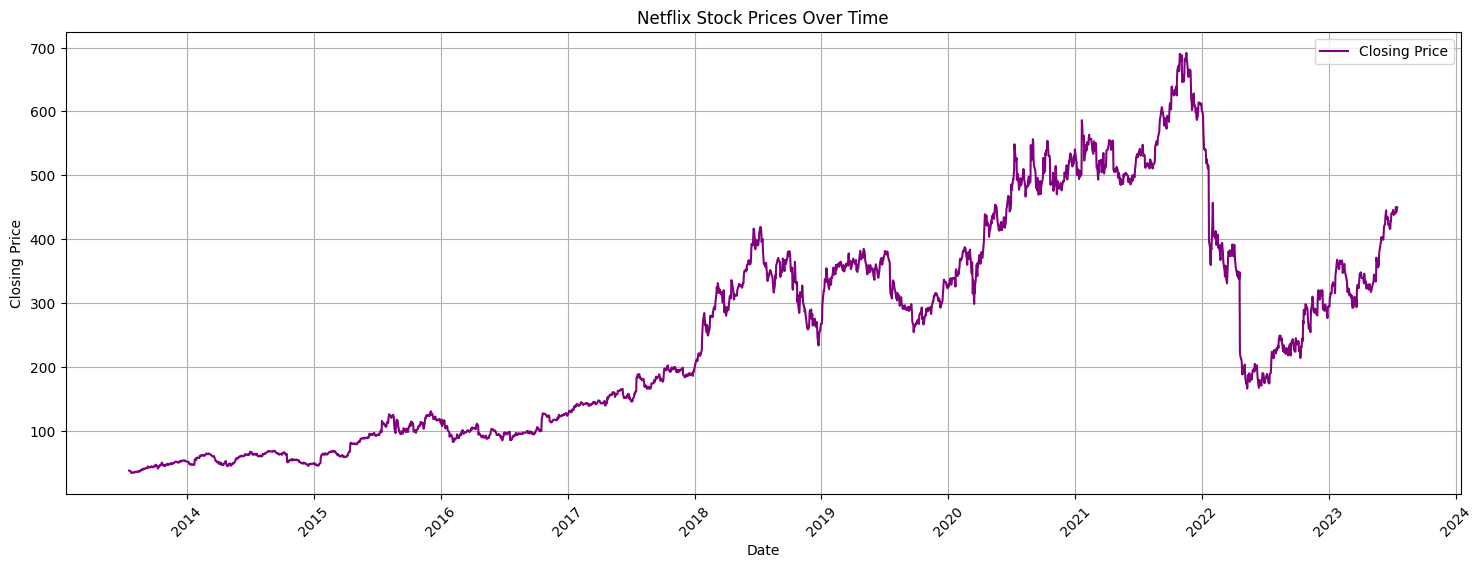

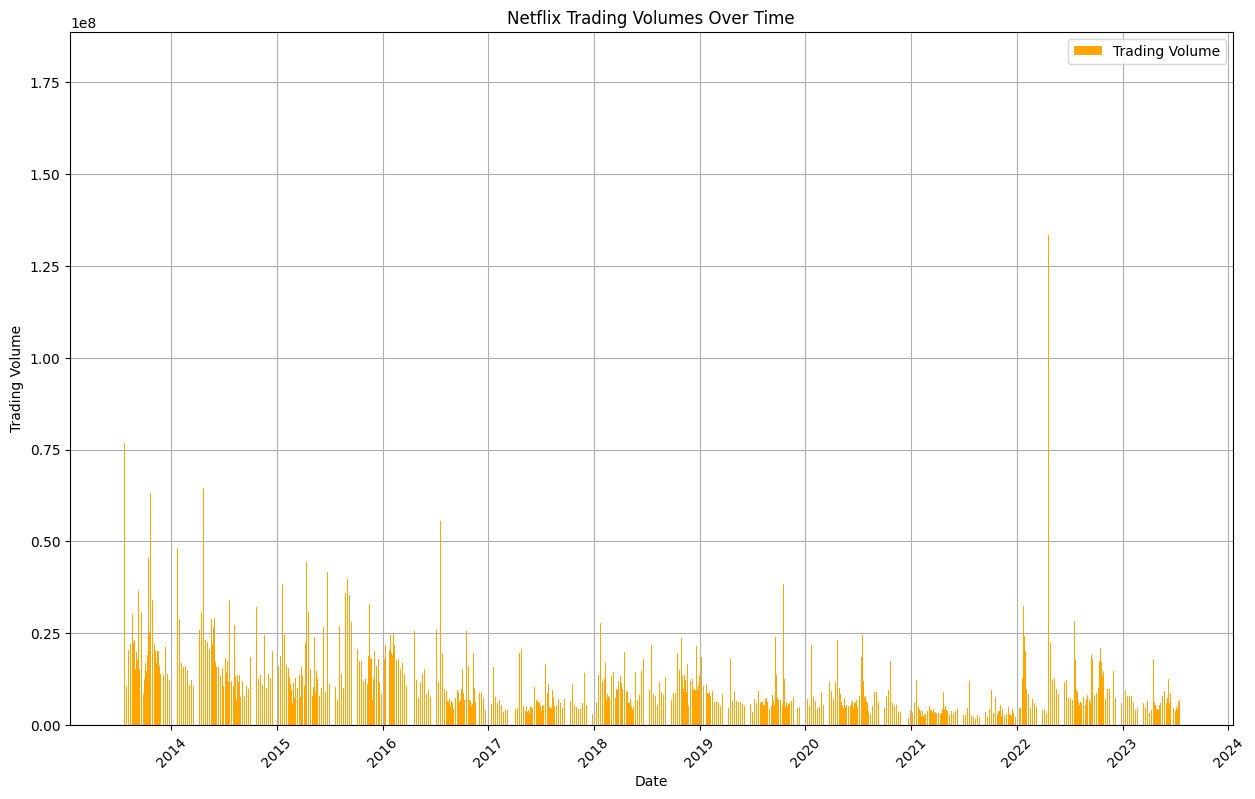

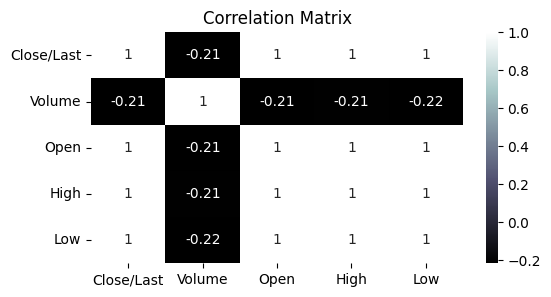

In [ ]:
netflix_data = stock_market[stock_market['Company'] == 'NFLX']

# Line chart for stock prices over time
plt.figure(figsize=(18, 6))
plt.plot(netflix_data['Date'], netflix_data['Close/Last'], color='purple',label='Closing Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('Netflix Stock Prices Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Bar plot for trading volumes over time
plt.figure(figsize=(15, 9))
plt.bar(netflix_data ['Date'], netflix_data['Volume'], label='Trading Volume', color='orange')
plt.xlabel('Date')
plt.ylabel('Trading Volume')
plt.title('Netflix Trading Volumes Over Time')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Heatmap to visualize correlations between numeric columns
correlation_matrix = stock_market.corr(numeric_only=True)
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True,cmap="bone")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# Calculate the percentage change in stock prices for each company
stock_market['Price_Growth'] = stock_market.groupby('Company')['Close/Last'].pct_change() * 100

# Calculate the total trading volume for each company
stock_market['Total_Volume'] = stock_market.groupby('Company')['Volume'].transform('sum')

# Identify the top-performing companies based on stock price growth
top_performers_price = stock_market.groupby('Company')['Price_Growth'].mean().nlargest(5)

# Identify the top-performing companies based on trading volume
top_performers_volume = stock_market.groupby('Company')['Total_Volume'].mean().nlargest(5)

# Create DataFrames for top-performing companies based on stock price growth and trading volume
top_performers_price_df = pd.DataFrame({'Top Performers (Price Growth)': top_performers_price.index, 'Average Price Growth': top_performers_price.values})
top_performers_volume_df = pd.DataFrame({'Top Performers (Trading Volume)': top_performers_volume.index, 'Average Trading Volume': top_performers_volume.values})

# Concatenate the two DataFrames horizontally
result_table = pd.concat([top_performers_price_df, top_performers_volume_df], axis=1)

# Display the result table
print(result_table)


  Top Performers (Price Growth)  Average Price Growth  \
0                          QCOM             -0.003706   
1                          CSCO             -0.014164   
2                          SBUX             -0.029417   
3                          NFLX             -0.056923   
4                           AMD             -0.063900   

  Top Performers (Trading Volume)  Average Trading Volume  
0                            AAPL            3.760073e+11  
1                            TSLA            2.899529e+11  
2                            AMZN            2.014404e+11  
3                             AMD            1.343899e+11  
4                            MSFT            7.833965e+10  


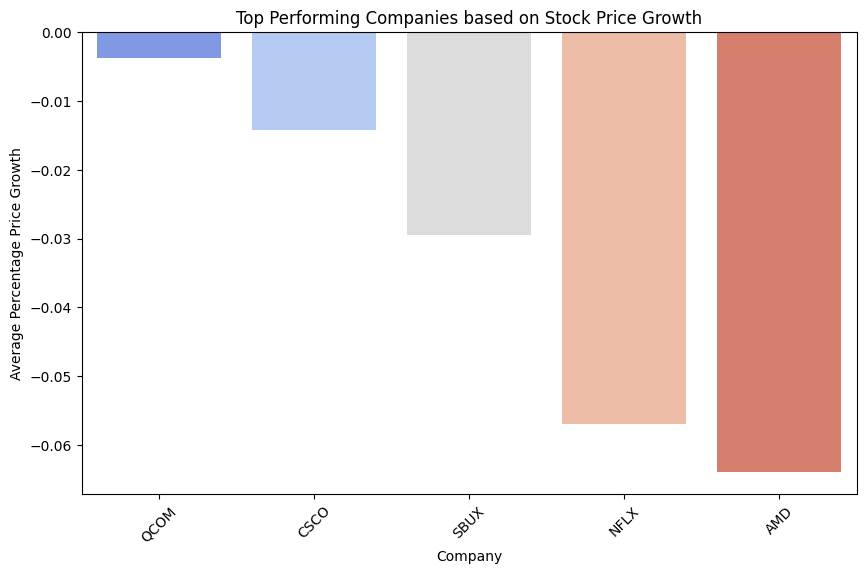

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_performers_price.index, y=top_performers_price.values, palette='coolwarm')
plt.title('Top Performing Companies based on Stock Price Growth')
plt.xlabel('Company')
plt.ylabel('Average Percentage Price Growth')
plt.xticks(rotation=45)
plt.show()


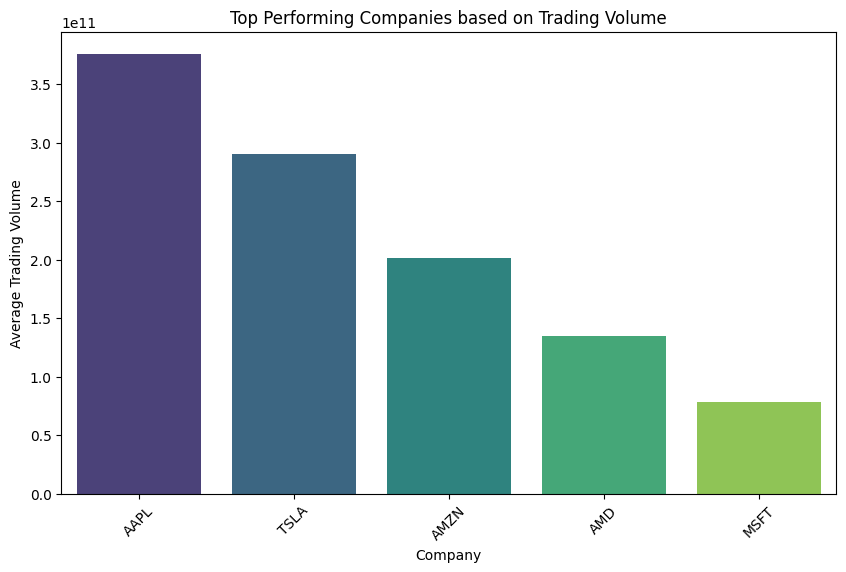

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_performers_volume.index, y=top_performers_volume.values, palette='viridis')
plt.title('Top Performing Companies based on Trading Volume')
plt.xlabel('Company')
plt.ylabel('Average Trading Volume')
plt.xticks(rotation=45)
plt.show()


In [ ]:
# Calculate the standard deviation of closing prices for each company
volatility_df = stock_market.groupby('Company')['Close/Last'].std()

# Sort the companies based on their volatility (ascending or descending, as per your preference)
sorted_volatility_df = volatility_df.sort_values(ascending=False)

# Display the volatility of each company
print(sorted_volatility_df)

Company
NFLX    168.759861
TSLA    104.487703
MSFT     94.808841
META     79.822152
AAPL     52.459923
AMZN     51.854820
AMD      39.991063
QCOM     34.979906
SBUX     23.795273
CSCO     11.089336
Name: Close/Last, dtype: float64


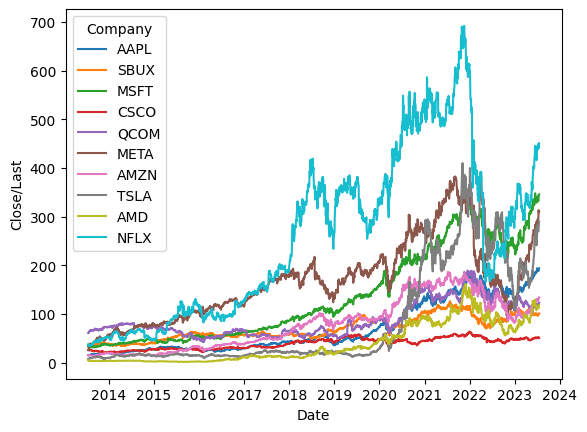

In [ ]:
sns.lineplot(data=stock_market, x='Date', y='Close/Last', hue='Company')
plt.show()

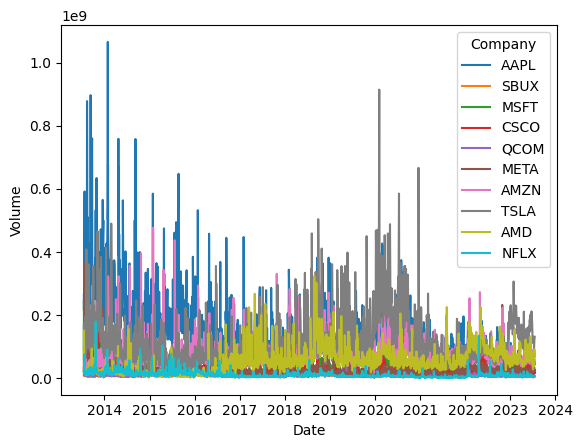

In [ ]:
sns.lineplot(data=stock_market, x='Date', y='Volume', hue='Company')
plt.show()

In [ ]:
stocks_close = stock_market.set_index(['Date', 'Company'])['Close/Last'].unstack()
stocks_close.head()


Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
2013-07-18,15.4199,4.64,15.2055,25.86,26.180,35.44,38.0586,61.115,34.240,7.9353
2013-07-19,15.1768,4.03,15.2615,25.82,25.881,31.40,37.7966,61.460,34.395,7.9787
2013-07-22,15.2254,3.90,15.1740,25.72,26.045,32.01,37.4228,62.210,34.510,8.1620
2013-07-23,14.9639,3.66,15.0530,25.56,26.130,31.82,35.7514,62.300,33.830,8.1827
2013-07-24,15.7325,3.63,14.9470,25.59,26.510,31.96,34.4714,61.390,33.305,8.1133


In [ ]:
stocks_daily_change = stocks_close.pct_change()
stocks_daily_change.head()

Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
2013-07-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-07-19,-0.015765,-0.131466,0.003683,-0.001547,-0.011421,-0.113995,-0.006884,0.005645,0.004527,0.005469
2013-07-22,0.003202,-0.032258,-0.005733,-0.003873,0.006337,0.019427,-0.009890,0.012203,0.003344,0.022974
2013-07-23,-0.017175,-0.061538,-0.007974,-0.006221,0.003264,-0.005936,-0.044663,0.001447,-0.019704,0.002536
2013-07-24,0.051364,-0.008197,-0.007042,0.001174,0.014543,0.004400,-0.035803,-0.014607,-0.015519,-0.008481


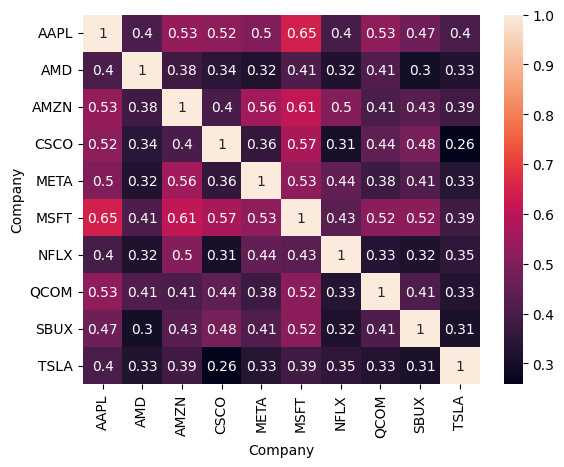

In [ ]:
stocks_daily_change_corr = stocks_daily_change.corr()
sns.heatmap(stocks_daily_change_corr, annot=True)
plt.show()

In [ ]:
stocks_close_after_2020 = stocks_close.loc['2020':]
stocks_close_after_2020.head()

Company,AAPL,AMD,AMZN,CSCO,META,MSFT,NFLX,QCOM,SBUX,TSLA
Date,,,,,,,,,,
2020-01-02,75.0875,49.10,94.9005,48.42,209.78,160.62,329.81,88.69,89.35,28.6840
2020-01-03,74.3575,48.60,93.7485,47.63,208.67,158.62,325.90,87.02,88.83,29.5340
2020-01-06,74.9500,48.39,95.1440,47.80,212.60,159.03,335.83,86.51,88.13,30.1027
2020-01-07,74.5975,48.25,95.3430,47.49,213.06,157.58,330.75,88.97,87.86,31.2707
2020-01-08,75.7975,47.83,94.5985,47.52,215.22,160.09,339.26,88.71,88.88,32.8093


In [ ]:
price_changes_after_2020 = (stocks_close_after_2020.iloc[-1] / stocks_close_after_2020.iloc[0]-1).mul(100)
print('Top3 company is ', price_changes_after_2020.nlargest(3).index.to_list())
print("Top3 company's price change rate is ", price_changes_after_2020.nlargest(3).values, '%')

Top3 company is  ['TSLA', 'AAPL', 'AMD']
Top3 company's price change rate is  [912.34137498 158.35192276 140.97759674] %


         Std_annual
Company            
AMD        0.581313
TSLA       0.562774
NFLX       0.446620
META       0.389415
QCOM       0.350051
AMZN       0.329933
AAPL       0.285914
MSFT       0.274372
SBUX       0.261050
CSCO       0.251341


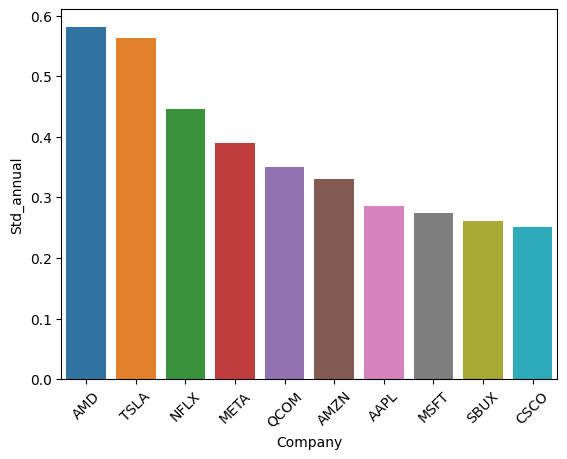

In [ ]:
stocks_daily_change_volatility_annualized = pd.DataFrame(stocks_daily_change.std()*np.sqrt(252), columns=['Std_annual']).sort_values(by='Std_annual', ascending=False)
print(stocks_daily_change_volatility_annualized)

sns.barplot(data=stocks_daily_change_volatility_annualized, x=stocks_daily_change_volatility_annualized.index, y=stocks_daily_change_volatility_annualized.Std_annual)
plt.xticks(rotation=45)
plt.show()

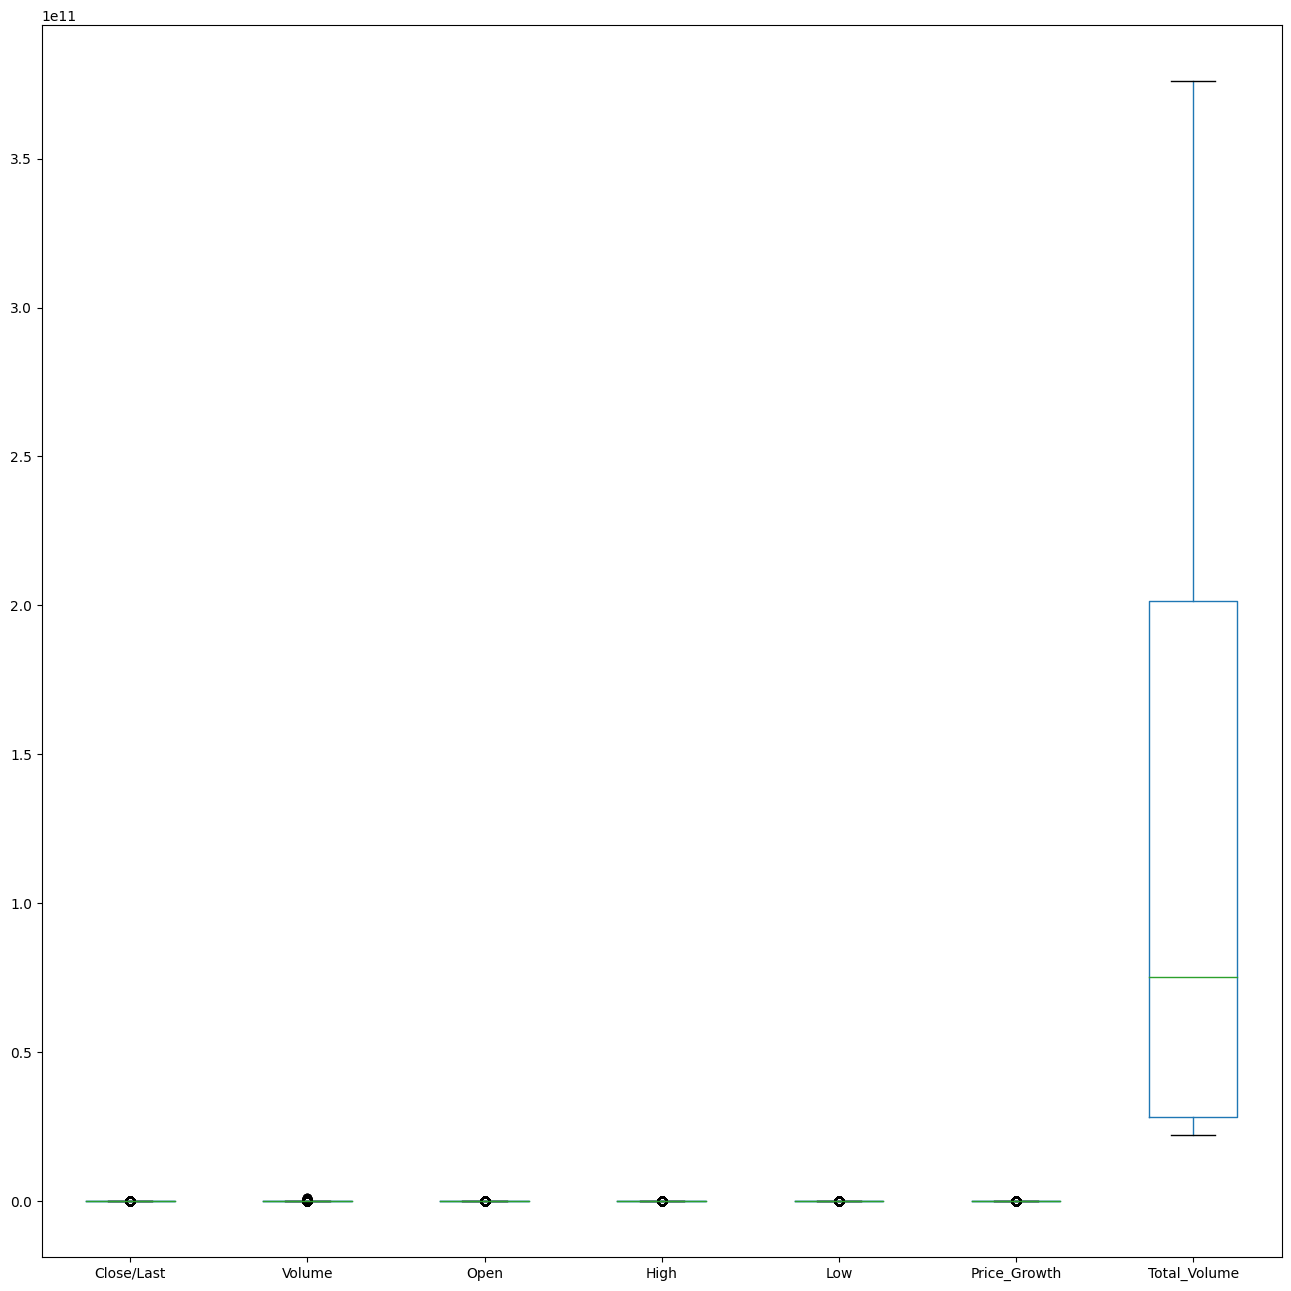

In [ ]:
plt.figure(figsize=(16,16))
stock_market.boxplot(grid=False)
plt.xticks()
plt.show()

In [ ]:
import numpy as np

col_names = ["Close/Last","Volume","Open","High","Low","Price_Growth"]


for col in col_names:
    if col not in stock_market.columns:
        print(f"'{col}' column does not exist in the DataFrame.")


for col in col_names:
    if col in stock_market.columns and stock_market[col].dtype != 'object':

        Q1 = np.nanpercentile(stock_market[col], 25)
        Q3 = np.nanpercentile(stock_market[col], 75)


        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR


        stock_market[col] = np.where(stock_market[col] < lower_bound, lower_bound, stock_market[col])
        stock_market[col] = np.where(stock_market[col] > upper_bound, upper_bound, stock_market[col])

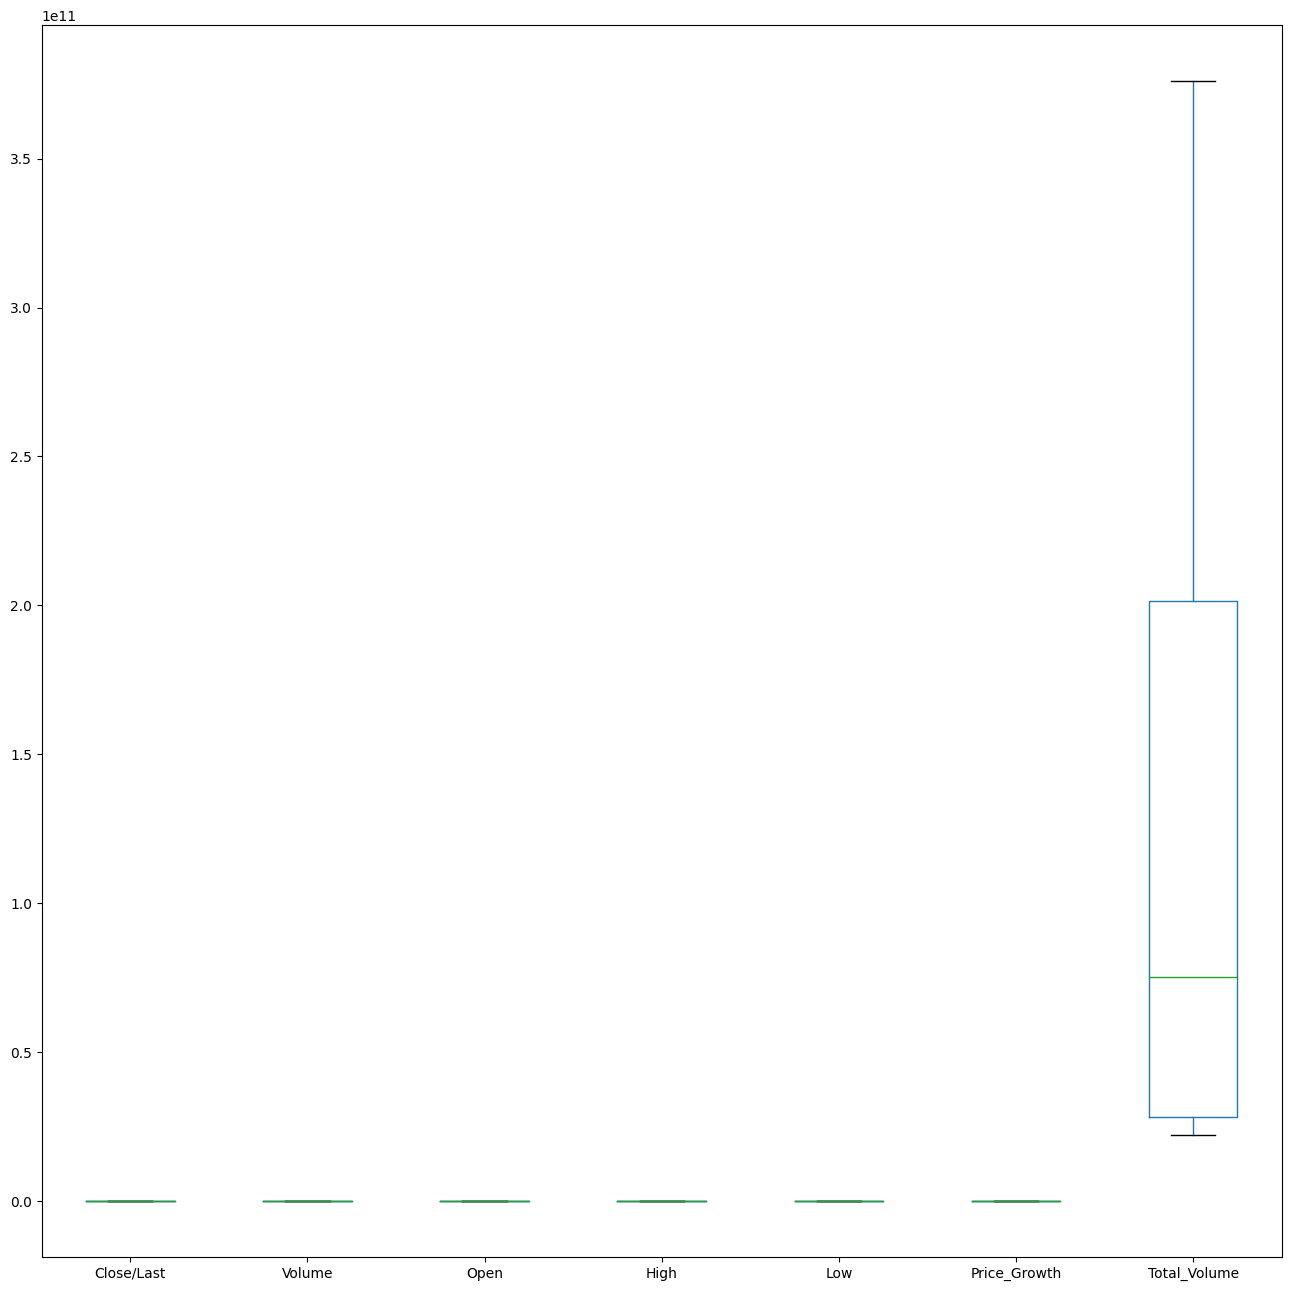

In [ ]:
plt.figure(figsize=(16,16))
stock_market.boxplot(grid=False)
plt.xticks()
plt.show()

In [ ]:
x = stock_market.drop('Close/Last', axis=1)
y = stock_market['Close/Last']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Set the target variable
y = stock_market['Close/Last']

# Select features (you can include other columns as needed)
X = stock_market.drop(['Company', 'Date', 'Close/Last'], axis=1)

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train an XGBoost Regressor
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


Mean Squared Error: 1.3237477657471606
R-squared: 0.9997872826497074
Mean Absolute Error: 0.6230881626136239


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer to fill missing values
imputer = SimpleImputer(strategy='median')  # You can choose other strategies as well

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Initialize and train a RandomForest Regressor
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_imputed, y_train)

# Transform the test data with the same imputer
X_test_imputed = imputer.transform(X_test)

# Make predictions on the test set
y_pred = regressor.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)



Mean Squared Error: 1.0661791772062554
R-squared: 0.9998286721871184
Mean Absolute Error: 0.5121480432068564


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train a Gradient Boosting Regressor
regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train_imputed, y_train)  # Use the imputed training data

# Make predictions on the test set
y_pred = regressor.predict(X_test_imputed)  # Use the imputed test data

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Gradient Boosting Regressor Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


Gradient Boosting Regressor Results:
Mean Squared Error: 1.647302738685275
R-squared: 0.9997352895447532
Mean Absolute Error: 0.759255510071104


In [ ]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Initialize and train a Support Vector Machine Regressor
regressor = SVR(kernel='linear')
regressor.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Support Vector Machine (SVM) Regressor Results:")
print("Mean Squared Error:", mse)
print("R-squared:", r2)
print("Mean Absolute Error:", mae)


Support Vector Machine (SVM) Regressor Results:
Mean Squared Error: 1.140406988869134
R-squared: 0.9998167442777208
Mean Absolute Error: 0.5509994414094748


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Assuming your DataFrame is named stock_market
# Define your features and target
features = stock_market[['Volume', 'Open', 'High', 'Low']]
target = stock_market['Close/Last']

# Split your data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on both training and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate metrics for both training and test data
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

print("Training Data Metrics:")
print(f"Mean Squared Error: {train_mse}")
print(f"R-squared: {train_r2}")
print(f"Mean Absolute Error: {train_mae}")

print("\nTest Data Metrics:")
print(f"Mean Squared Error: {test_mse}")
print(f"R-squared: {test_r2}")
print(f"Mean Absolute Error: {test_mae}")


Training Data Metrics:
Mean Squared Error: 0.9191235551630964
R-squared: 0.9998566930562477
Mean Absolute Error: 0.4927375424990825

Test Data Metrics:
Mean Squared Error: 0.8335665904735853
R-squared: 0.999868043811771
Mean Absolute Error: 0.49616833362998053


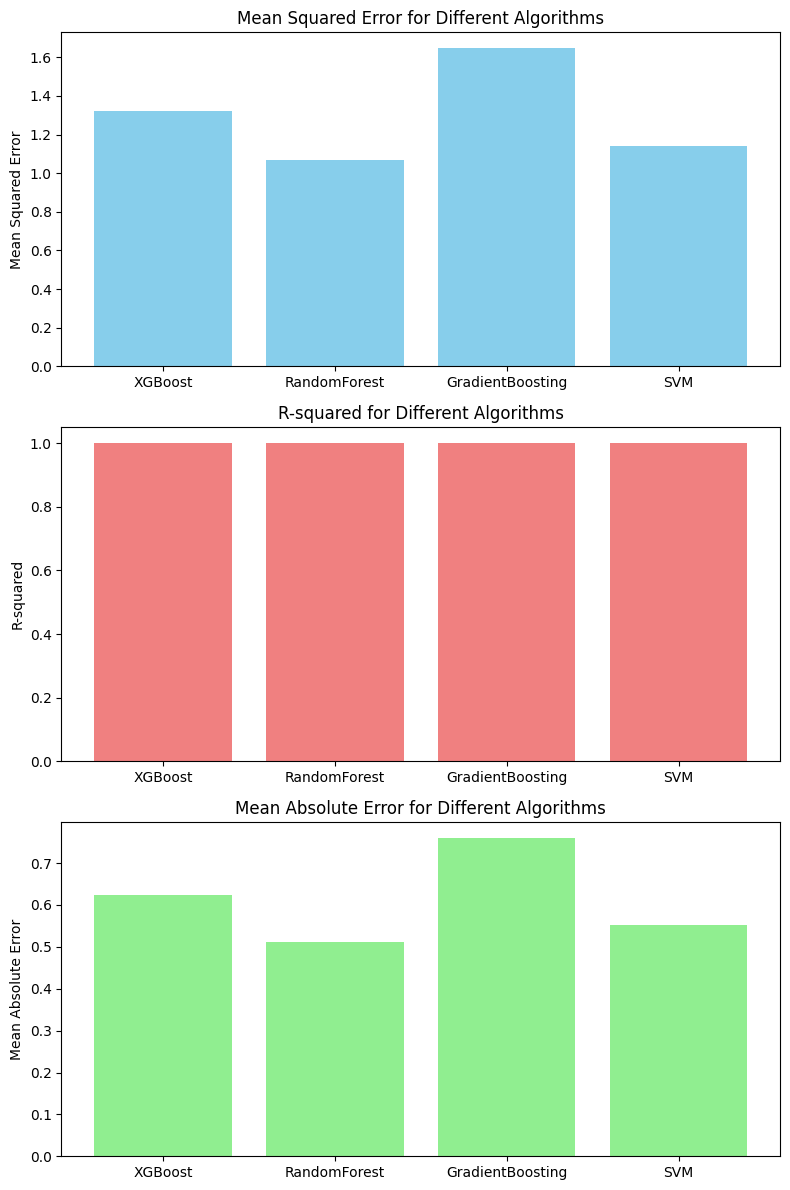

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

y = stock_market['Close/Last']

# Select features (you can include other columns as needed)
X = stock_market.drop(['Company', 'Date', 'Close/Last'], axis=1)

# Encode categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train an XGBoost Regressor
xgboost_regressor = xgb.XGBRegressor()
xgboost_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgboost = xgboost_regressor.predict(X_test)

# Evaluate the model
mse_xgboost = mean_squared_error(y_test, y_pred_xgboost)
r2_xgboost = r2_score(y_test, y_pred_xgboost)
mae_xgboost = mean_absolute_error(y_test, y_pred_xgboost)

# Random Forest Regressor
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
randomforest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
randomforest_regressor.fit(X_train_imputed, y_train)
y_pred_randomforest = randomforest_regressor.predict(X_test_imputed)
mse_randomforest = mean_squared_error(y_test, y_pred_randomforest)
r2_randomforest = r2_score(y_test, y_pred_randomforest)
mae_randomforest = mean_absolute_error(y_test, y_pred_randomforest)

# Gradient Boosting Regressor
gradientboost_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)
gradientboost_regressor.fit(X_train_imputed, y_train)
y_pred_gradientboost = gradientboost_regressor.predict(X_test_imputed)
mse_gradientboost = mean_squared_error(y_test, y_pred_gradientboost)
r2_gradientboost = r2_score(y_test, y_pred_gradientboost)
mae_gradientboost = mean_absolute_error(y_test, y_pred_gradientboost)

# SVM Regressor
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
svm_regressor = SVR(kernel='linear')
svm_regressor.fit(X_train_scaled, y_train)
y_pred_svm = svm_regressor.predict(X_test_scaled)
mse_svm = mean_squared_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)

# Define the algorithms and their corresponding metrics
algorithms = ["XGBoost", "RandomForest", "GradientBoosting", "SVM"]
mse_values = [mse_xgboost, mse_randomforest, mse_gradientboost, mse_svm]
r2_values = [r2_xgboost, r2_randomforest, r2_gradientboost, r2_svm]
mae_values = [mae_xgboost, mae_randomforest, mae_gradientboost, mae_svm]

# Create subplots for each metric
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Bar chart for Mean Squared Error
axs[0].bar(algorithms, mse_values, color='skyblue')
axs[0].set_ylabel('Mean Squared Error')
axs[0].set_title('Mean Squared Error for Different Algorithms')

# Bar chart for R-squared
axs[1].bar(algorithms, r2_values, color='lightcoral')
axs[1].set_ylabel('R-squared')
axs[1].set_title('R-squared for Different Algorithms')

# Bar chart for Mean Absolute Error
axs[2].bar(algorithms, mae_values, color='lightgreen')
axs[2].set_ylabel('Mean Absolute Error')
axs[2].set_title('Mean Absolute Error for Different Algorithms')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**CONCLUSION**

Among the four regression models assessed, XGBoost and Random Forest stand out for their robust predictive capabilities. They both exhibit minimal mean squared error (MSE) and mean absolute error (MAE), signifying their proficiency in making precise forecasts. XGBoost, in particular, boasts a slightly superior R-squared value, implying a stronger data fit. Gradient Boosting and Support Vector Machine (SVM) regression models, while still performing well, display slightly higher prediction errors when compared to XGBoost and Random Forest. In summary, XGBoost emerges as the top-performing model for this stock price prediction task, with Random Forest as a close contender. The choice between these two models may depend on specific requirements, striking a balance between prediction accuracy and computational complexity.